In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

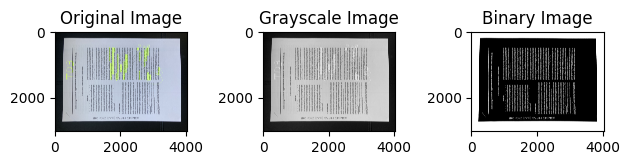

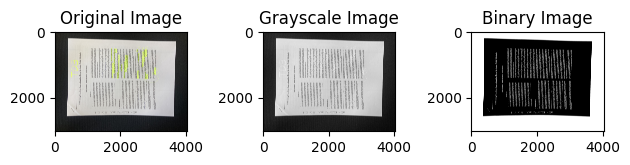

In [2]:
def show_img(jpg):
    gray_image = cv.cvtColor(jpg, cv.COLOR_BGR2GRAY)
    _, binary_image = cv.threshold(gray_image, 127+10, 255, cv.THRESH_BINARY)

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(jpg, cv.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Grayscale image
    plt.subplot(1, 3, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')

    # Binary image
    plt.subplot(1, 3, 3)
    plt.imshow(binary_image, cmap='binary')
    plt.title('Binary Image')

    plt.tight_layout()
    plt.show()

    return gray_image, binary_image

jpg1 = cv.imread('./KakaoTalk_20240516_134041401.jpg')
jpg2 = cv.imread('./KakaoTalk_20240516_134148374.jpg')

gray1, bi1 = show_img(jpg1)
gray2, bi2 = show_img(jpg2)

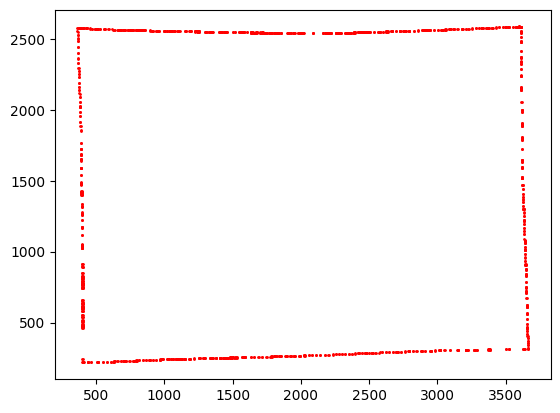

In [43]:
# contours, _ = cv.findContours(bi1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
contours, _ = cv.findContours(bi2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=cv.contourArea)
plt.scatter(contour[:, 0, 0], contour[:, 0, 1], c='r', s=1)

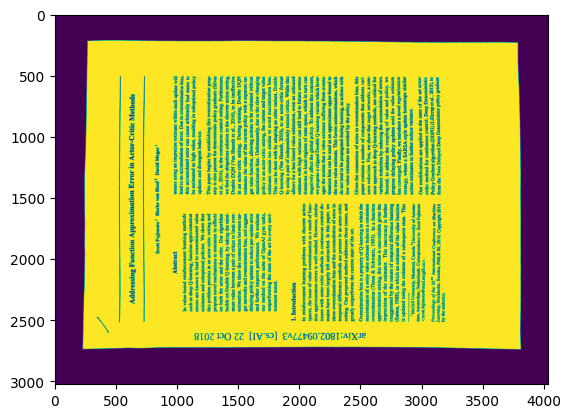

In [38]:
# cnt = contours[4]
plt.imshow(cv.drawContours(bi1, contours, -1, (0,255,0), 3))

In [10]:
A4_SIZE_X = 297
A4_SIZE_Y = 210
dst = np.array([[A4_SIZE_X - 1, A4_SIZE_Y -1], 
                [A4_SIZE_X - 1, 0], 
                [0, 0], 
                [0, A4_SIZE_Y - 1]], dtype=np.float32)

In [8]:
# Step 1: 이미지를 그레이스케일로 변환합니다.
image = jpg1
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Step 2: 엣지 검출을 수행하여 문서의 윤곽을 찾습니다.
# edges = cv.Canny(gray, 50, 150)

# Step 3: 윤곽선을 찾습니다.
contours, _ = cv.findContours(bi1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=cv.contourArea)

# Step 4: 직사각형을 찾습니다.
rect = cv.minAreaRect(contour)
box = cv.boxPoints(rect)
box = box.astype(int)

# Step 5: 찾은 직사각형 부분을 원본 이미지에서 자릅니다.
warp = cv.drawContours(image.copy(), [box], -1, (0, 255, 0), 2)
warp = cv.cvtColor(warp, cv.COLOR_BGR2RGB)

# 결과를 표시합니다.
cv.namedWindow('Original Image', cv.WINDOW_NORMAL)
cv.resizeWindow('Original Image', 800, 600)
cv.imshow('Original Image', image)
cv.namedWindow('Document Warp', cv.WINDOW_NORMAL)
cv.resizeWindow('Document Warp', 800, 600)
cv.imshow('Document Warp', cv.cvtColor(warp, cv.COLOR_BGR2RGB))
cv.waitKey(0)
cv.destroyAllWindows()


In [31]:
# Step 1: 이미지를 그레이스케일로 변환합니다.
image = jpg2
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Step 2: 엣지 검출을 수행하여 문서의 윤곽을 찾습니다.
edges = cv.Canny(gray, 50, 150)

# Step 3: 윤곽선을 찾습니다.
contours, _ = cv.findContours(bi2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=cv.contourArea)

# Step 4: 직사각형을 찾습니다.
rect = cv.minAreaRect(contour)
box = cv.boxPoints(rect)
box = box.astype(int)

# Step 5: 사전에 주어진 frame 크기에 맞추기 위해 변환 행렬을 계산합니다.
perspective_transform = cv.getPerspectiveTransform(box.astype(np.float32), dst)

# Step 6: 원근 변환을 수행합니다.
warped_image = cv.warpPerspective(image, perspective_transform, (297*3, 210*3))

# 결과를 표시합니다.
cv.namedWindow('Original Image', cv.WINDOW_NORMAL)
cv.resizeWindow('Original Image', 800, 600)
cv.imshow('Original Image', image)
cv.namedWindow('Document Warp', cv.WINDOW_NORMAL)
cv.resizeWindow('Document Warp', 297*3, 210*3)
cv.imshow('Document Warp', warped_image)
cv.waitKey(0)
cv.destroyAllWindows()


In [12]:
box

array([[ 361, 2575],
       [ 399,  218],
       [3667,  270],
       [3630, 2627]])

In [29]:
A4_SIZE_X = 297*3
A4_SIZE_Y = 210*3
dst = np.array([[0, A4_SIZE_Y -1], 
                [0, 0], 
                [A4_SIZE_X - 1, 0], 
                [A4_SIZE_X - 1, A4_SIZE_Y - 1]], dtype=np.float32)